In [237]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [238]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [239]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [240]:
X = iris.data
Y = iris.target

In [241]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [242]:
from keras.utils import to_categorical

In [243]:
Y = to_categorical(Y)

In [244]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [245]:
# split into train and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [246]:
#create the keras model
model = Sequential()

In [247]:
model.add(Dense(32, input_dim = 4,activation = 'relu')) # input_dim = input dimesion
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

## Compile model

In [248]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [249]:
# Train the model
result = model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_data=(X_test, Y_test))


Epoch 1/20
8/8 [==============================] - 1s 19ms/step - loss: 1.6438 - accuracy: 0.3333 - val_loss: 1.4763 - val_accuracy: 0.3333
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 1.3514 - accuracy: 0.3333 - val_loss: 1.2443 - val_accuracy: 0.3333
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 1.1580 - accuracy: 0.3333 - val_loss: 1.0875 - val_accuracy: 0.3333
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 1.0256 - accuracy: 0.3333 - val_loss: 0.9723 - val_accuracy: 0.3333
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.9330 - accuracy: 0.3333 - val_loss: 0.8957 - val_accuracy: 0.3333
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 0.8781 - accuracy: 0.3583 - val_loss: 0.8462 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.8360 - accuracy: 0.5333 - val_loss: 0.8083 - val_accuracy: 0.5667
Epoch 8/20
8/8 [=================

In [250]:
loss, accuracy = model.evaluate(X_test, Y_test)


1/1 [==============================] - 0s 16ms/step - loss: 0.4739 - accuracy: 0.9667


In [256]:
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 5ms/step


array([[0.31554443, 0.41748416, 0.26697138],
       [0.9385603 , 0.05944742, 0.00199224],
       [0.23215543, 0.08316243, 0.68468213],
       [0.3139634 , 0.39648294, 0.2895536 ],
       [0.313375  , 0.46191758, 0.22470737],
       [0.9285506 , 0.06826204, 0.00318741],
       [0.41283926, 0.45344827, 0.13371252],
       [0.28533772, 0.1808658 , 0.5337964 ],
       [0.28937557, 0.28053755, 0.43008688],
       [0.34448865, 0.501229  , 0.15428236],
       [0.3006916 , 0.20818003, 0.49112836],
       [0.9036846 , 0.09126077, 0.00505456],
       [0.9507384 , 0.0476177 , 0.0016439 ],
       [0.9030139 , 0.09213921, 0.00484693],
       [0.9308346 , 0.06661091, 0.00255449],
       [0.3227703 , 0.46290413, 0.21432555],
       [0.22055912, 0.06646455, 0.7129763 ],
       [0.32736   , 0.48941258, 0.18322739],
       [0.31783548, 0.35524854, 0.32691604],
       [0.22305365, 0.07125534, 0.705691  ],
       [0.88201773, 0.11129193, 0.00669033],
       [0.29801422, 0.20545149, 0.49653435],
       [0.

In [251]:
import matplotlib.pyplot as plt

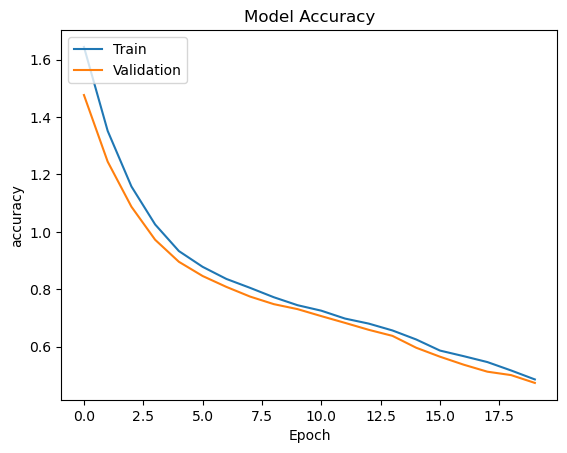

In [252]:
# Plot the training and validation accuracy over epochs
plt.plot(result.history['loss']) #plt.plot() is a function used to create a line plot of two or more arrays of data
plt.plot(result.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

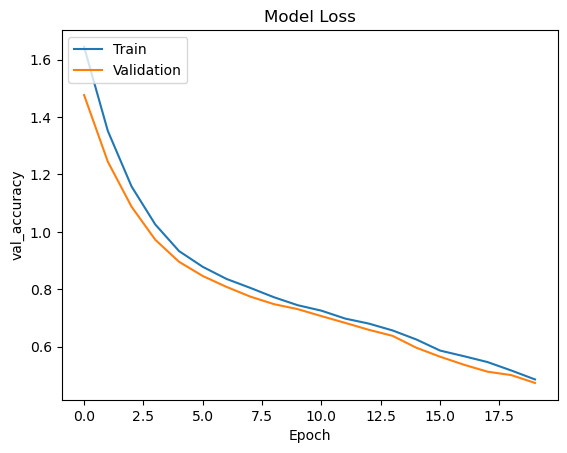

In [253]:
# Plot the training and validation loss over epochs
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('val_accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()